<a href="https://colab.research.google.com/github/marcoss00/fundamentos_ia_data_science/blob/master/Atividade_4_Programas_em_Python_for_p_value%2C_confidence_intervals_e_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A - Correlação

Faça plotes similares as duas figuras mostradas nos dois próximos slides.

Cada uma deve ter 9 pontos. A segunda deve ter seus dados gerados aleatoriamente com uma distribuição uniforme no mesmo intervalo da primeira.

Use a função linregress para achar um reta que represente os dados e também para calcular o p-value. Interprete os resultados. Pesquise sobre a função linregress.

Calcule a covariância e interprete os resultados.

## Linregress

O linregress é uma função do módulo scipy.stats usada para realizar uma regressão linear simples. Ela calcula os parâmetros da linha de melhor ajuste entre duas variáveis, com o objetivo de modelar a relação linear entre elas. Isso é útil para entender como uma variável depende de outra e pode ser usado para previsões.

* slope: inclinação da reta (quanto y varia com x)

* intercept: ponto em que a reta cruza o eixo y

* r_value: coeficiente de correlação de Pearson

* p_value: significância estatística da correlação (probabilidade da relação ser por acaso)

* std_err: erro padrão da estimativa da inclinação

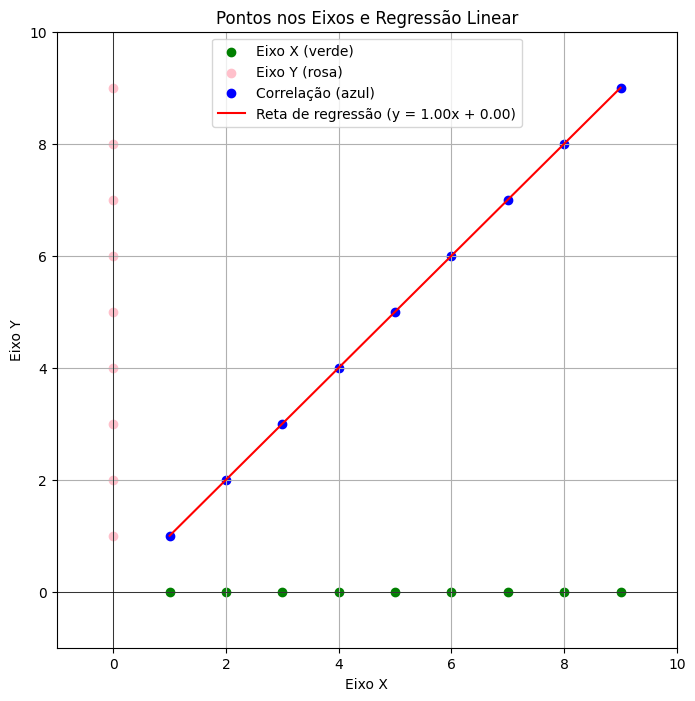

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

x = np.linspace(1, 9, 9)
y = np.linspace(1, 9, 9)

# Calcular a regressão linear sobre os pontos (x, y)
slope, intercept, r_value, p_value, std_err = linregress(x, y)
regressao_y = slope * x + intercept  # valores da reta

plt.figure(figsize=(8, 8))

plt.scatter(x, np.zeros_like(x), color='green', label='Eixo X (verde)')

plt.scatter(np.zeros_like(y), y, color='pink', label='Eixo Y (rosa)')

plt.scatter(x, y, color='blue', label='Correlação (azul)')

plt.plot(x, regressao_y, color='red', linestyle='-', label=f'Reta de regressão (y = {slope:.2f}x + {intercept:.2f})')

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Pontos nos Eixos e Regressão Linear')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.legend()
plt.grid(True)
plt.xlim(-1, 10)
plt.ylim(-1, 10)

plt.show()

## Covariância

$$
\text{Cov}(X, Y) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})
$$

$$
\text{Onde:}
$$

$$
x_i \text{ e } y_i \text{ são os valores das variáveis } x \text{ e } y,
$$

$$
\bar{x} \text{ e } \bar{y} \text{ são as médias de } x \text{ e } y,
$$

$$
n \text{ é o número de elementos (neste caso, 9)}.
$$

In [12]:
cov_xy = np.cov(x, y)[0, 1]
cov_xy

np.float64(7.5)

In [13]:
p_value

np.float64(3.292585384803146e-70)

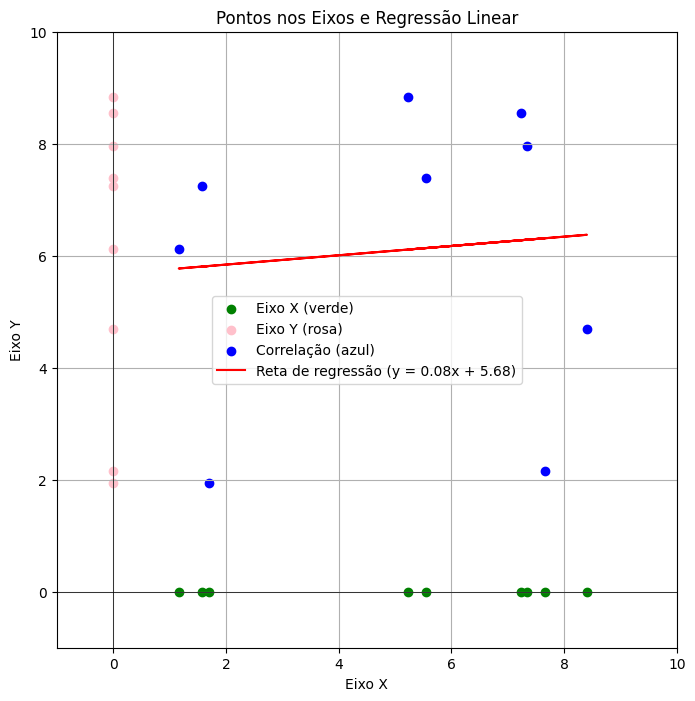

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

x = np.random.uniform(1, 9, 9)
y = np.random.uniform(1, 9, 9)

# Calcular a regressão linear sobre os pontos (x, y)
slope, intercept, r_value, p_value, std_err = linregress(x, y)
regressao_y = slope * x + intercept  # valores da reta

plt.figure(figsize=(8, 8))

plt.scatter(x, np.zeros_like(x), color='green', label='Eixo X (verde)')

plt.scatter(np.zeros_like(y), y, color='pink', label='Eixo Y (rosa)')

plt.scatter(x, y, color='blue', label='Correlação (azul)')

plt.plot(x, regressao_y, color='red', linestyle='-', label=f'Reta de regressão (y = {slope:.2f}x + {intercept:.2f})')

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Pontos nos Eixos e Regressão Linear')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.legend()
plt.grid(True)
plt.xlim(-1, 10)
plt.ylim(-1, 10)

plt.show()

In [16]:
cov_xy = np.cov(x, y)[0, 1]
cov_xy

np.float64(0.6937973513167105)

In [17]:
p_value

np.float64(0.8143584099348234)

* 1 - Com **linspace**: Gera dados mais previsíveis, com uma regressão linear mais precisa, forte correlação, p-valor baixo e covariância estável.

* 2 - Com **random.uniform**: Gera dados mais dispersos e aleatórios, resulta em uma regressão linear menos confiável, correlação mais fraca, p-valor mais alto e maior variação na covariância.

# B: Estimando um Intervalo de Confiança para a Média

Obtenha um conjunto de dados amostrais (por exemplo, pesos de indivíduos, notas de testes, etc.).

* Calcule o intervalo de confiança de 95% para a média da população seguindo os passos:
* Calcular a média e o desvio padrão da amostra.
Usar a fórmula para intervalo de confiança ou a biblioteca scipy.stats.  
  
  
Desafio: Repetir o processo para diferentes níveis de confiança (por exemplo, 90%, 99%) e comparar os resultados.

Visualizar os intervalos de confiança em um gráfico usando matplotlib para mostrar a variabilidade.


$$
IC = \bar{x} \pm t_{\alpha/2, \, n-1} \cdot \left( \frac{s}{\sqrt{n}} \right)
$$


Onde:

$$
\bar{x} = \text{média da amostra}
$$

$$
s = \text{desvio padrão da amostra}
$$

$$
n = \text{tamanho da amostra}
$$

$$
t_{\alpha/2, \, n-1} = \text{valor crítico da distribuição } t \text{ de Student com } n-1 \text{ graus de liberdade}
$$

In [18]:
pip install ucimlrepo

In [35]:
from ucimlrepo import fetch_ucirepo
from scipy import stats

adult = fetch_ucirepo(id=2)

X = adult.data.features
idades = X['age']
print(idades)

0        39
1        50
2        38
3        53
4        28
         ..
48837    39
48838    64
48839    38
48840    44
48841    35
Name: age, Length: 48842, dtype: int64


In [50]:
media_idades = np.mean(idades)
desvio_padrao = np.std(idades, ddof=1)  # ddof=1 para usar o desvio padrão amostral
n = len(idades)
erro_padrao = desvio_padrao / np.sqrt(n)
niveis_confianca = [0.90, 0.95, 0.99]

In [54]:
cores = ['skyblue', 'orange', 'lightgreen']
inferiores = []
superiores = []
labels = []

for confianca in niveis_confianca:
  t_critico = stats.t.ppf((1 + confianca) / 2, df=n-1)
  margem_erro = t_critico * erro_padrao
  limite_inferior = media_idades - margem_erro
  limite_superior = media_idades + margem_erro

  inferiores.append(limite_inferior)
  superiores.append(limite_superior)
  labels.append(f"{int(confianca * 100)}%")

  print(f"Intervalo de confiança de {confianca}: ({limite_inferior:.2f}, {limite_superior:.2f})")

Intervalo de confiança de 0.9: (38.54, 38.75)
Intervalo de confiança de 0.95: (38.52, 38.77)
Intervalo de confiança de 0.99: (38.48, 38.80)


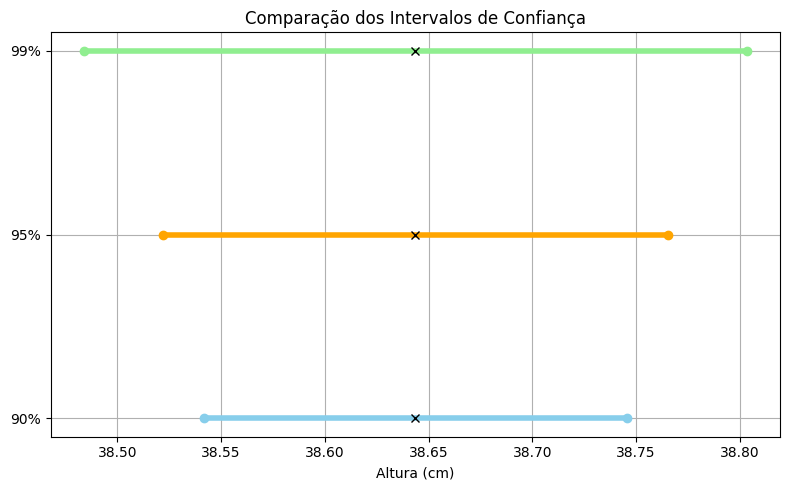

In [55]:
fig, ax = plt.subplots(figsize=(8, 5))
for i in range(len(niveis_confianca)):
    ax.plot([inferiores[i], superiores[i]], [i, i], marker='o', color=cores[i], linewidth=4)
    ax.plot(media_idades, i, marker='x', color='black')  # Marca a média

# Configurações do gráfico
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels)
ax.set_xlabel("Altura (cm)")
ax.set_title("Comparação dos Intervalos de Confiança")
ax.grid(True)
plt.tight_layout()
plt.show()

* "X" marca a média amostral

* Quanto maior o nível de confiança, mais largo é o intervalo.

* Isso ocorre porque queremos ter mais certeza de que a média verdadeira está dentro do intervalo — então ele precisa cobrir uma faixa maior.

* O 90% é mais estreito e “menos seguro”, enquanto o 99% é mais largo e “mais seguro”.

# C: p-value em um Teste de Hipótese

Supondo que estamos avaliando se um novo método de ensino melhora a pontuação dos alunos em um teste em comparação com o método tradicional.

In [59]:
np.random.seed(42)

# Grupo de controle (método tradicional)
controle = np.random.normal(loc=70, scale=2, size=30)

# Grupo de teste (novo método)
teste = np.random.normal(loc=76, scale=2, size=30)

## Hipótese nula
* H₀ (hipótese nula): Não há diferença significativa entre as médias dos dois grupos (novo método não tem efeito).

* H₁ (hipótese alternativa): Há uma diferença significativa entre as médias dos dois grupos.

In [61]:
from scipy.stats import ttest_ind

# Teste t (assumindo variâncias iguais)
t_value, p_value = ttest_ind(teste, controle)

print("t-value:", t_value)
print("p-value:", p_value)

t-value: 12.972105564696777
p-value: 8.612382998323301e-19


* O valor-p é muito menor que 0.05, o que nos leva a rejeitar a hipótese nula com alta confiança.

* Existe uma diferença estatisticamente significativa entre os grupos. Ou seja, o novo método de ensino teve impacto nas pontuações dos alunos em comparação com o método tradicional.

# D: significance_level

Faça slides explicando o código abaixo e interpretando os resultados  
.....  
Teste com dois valores para significance_level
Pelo menos quatro slides com a explicação e interpretação.

--------------------------------

## Introdução:
O código é uma simulação estatística feita para estimar a taxa de erro do Tipo I (ou falso positivo) de um teste t de Student, que é usado para comparar médias entre dois grupos independentes.

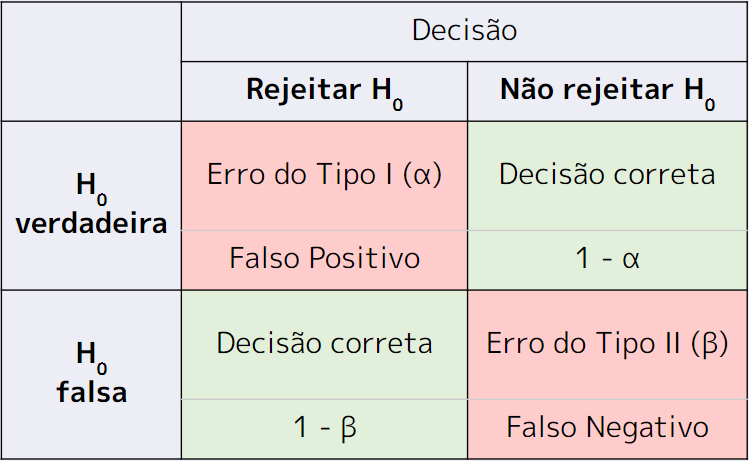

## Objetivo:  
Simular testes estatísticos para estimar a frequência de resultados "significativos" quando não há diferença real entre os grupos.

Passo a passo:

* Duas amostras são geradas da mesma distribuição.

* Aplicamos o teste t de Student (independente).

* Medimos a proporção de p-valores abaixo de um nível de significância (α).

## Conceitos Estatísticos
* Teste t (independente): verifica se duas médias são diferentes.

* Erro Tipo I (α): rejeitar a hipótese nula quando ela é verdadeira (falso positivo).

* Nível de significância (α): probabilidade máxima permitida de cometer esse erro.

In [ ]:
import numpy as np
from scipy.stats import ttest_ind


num_simulations = 10000
sample_size = 30
true_mean = 50
true_std = 10

* 10.000 simulações

* Amostras de tamanho 30

* Ambas as amostras vêm da mesma distribuição normal com média 50 e desvio 10

In [ ]:
significance_level = 0.05

* Resultado esperado: cerca de 5% dos testes devem ser falsos positivos

In [66]:
significant_results = 0

for _ in range(num_simulations):

    group1 = np.random.normal(true_mean, true_std, sample_size)
    group2 = np.random.normal(true_mean, true_std, sample_size)

    t_stat, p_value = ttest_ind(group1, group2)


    if p_value < significance_level:
        significant_results += 1

* Geração das amostras (group1 e group2)

* Aplicação do teste t

* Avaliação do p-valor

* Se o p-valor < α, consideramos o teste como significativo

* Contamos quantos testes deram falsos positivos

In [65]:
proportion_significant = significant_results / num_simulations


print(f"Number of simulations: {num_simulations}")
print(f"Significance level (alpha): {significance_level}")
print(f"Proportion of significant results (Type I error rate): {proportion_significant:.4f}")

Number of simulations: 10000
Significance level (alpha): 0.05
Proportion of significant results (Type I error rate): 0.0491


* Esperado: Se não há diferença real entre os grupos, então, ao repetir o teste muitas vezes, cerca de 5% das vezes o teste indicará falsamente uma diferença estatisticamente significativa.

* Resultado observado: 0.0491 (ou seja, 4,91% dos testes foram "significativos").

* Interpretação: Está muito próximo de 0.05, como esperado. Isso indica que o teste t está funcionando corretamente — ele está produzindo falsos positivos na taxa exata definida pelo nível de significância (alpha).

In [64]:
import numpy as np
from scipy.stats import ttest_ind


num_simulations = 10000
sample_size = 30
true_mean = 50
true_std = 10
significance_level = 0.01


significant_results = 0


for _ in range(num_simulations):

    group1 = np.random.normal(true_mean, true_std, sample_size)
    group2 = np.random.normal(true_mean, true_std, sample_size)


    t_stat, p_value = ttest_ind(group1, group2)


    if p_value < significance_level:
        significant_results += 1


proportion_significant = significant_results / num_simulations


print(f"Number of simulations: {num_simulations}")
print(f"Significance level (alpha): {significance_level}")
print(f"Proportion of significant results (Type I error rate): {proportion_significant:.4f}")

Number of simulations: 10000
Significance level (alpha): 0.01
Proportion of significant results (Type I error rate): 0.0116


* Esperado: Apenas 1% dos testes (falsamente) devem indicar uma diferença significativa.

* Resultado observado: 0.0116 (ou seja, 1,16% dos testes foram "significativos").

* Interpretação: Também está muito próximo de 0.01, confirmando que diminuir o nível de significância reduz a taxa de falsos positivos, como previsto pela teoria.

## Conclusão

* O teste t está se comportando corretamente: ele respeita o nível de significância definido (alpha).

* O erro do Tipo I (falso positivo) ocorre com frequência aproximadamente igual ao valor de alpha.

* Isso mostra por que escolher um valor de alpha mais baixo (como 0.01 em vez de 0.05) torna o teste mais rigoroso, reduzindo a chance de detectar diferenças que na verdade não existem — mas ao custo de aumentar a chance de erro do Tipo II (falsos negativos).

# E: reproduzindo slides em código

In [108]:
import numpy as np
from scipy.stats import t

# Função para calcular o intervalo de confiança para a média populacional
def intervalo_confianca_media(amostra, confianca=0.95):
    # n = len(amostra)
    n = 50
    # media_amostra = np.mean(amostra)
    media_amostra = 75.9
    desvio_padrao_amostra = np.std(amostra, ddof=1)
    erro_padrao = desvio_padrao_amostra / np.sqrt(n)

    # Calcula o t crítico
    t_critico = t.ppf((1 + confianca) / 2, df=n-1)

    # Intervalo de confiança
    margem_erro = t_critico * erro_padrao
    ic_inferior = media_amostra - margem_erro
    ic_superior = media_amostra + margem_erro

    return (ic_inferior, ic_superior)

amostra = [100, 74, 74, 78, 70, 67]
ic = intervalo_confianca_media(amostra)
print(f'Intervalo de confiança para a média populacional: {ic}')

Intervalo de confiança para a média populacional: (np.float64(72.54495210154124), np.float64(79.25504789845877))


In [109]:
import numpy as np
from scipy.stats import norm

# Função para calcular o intervalo de confiança para a proporção populacional
def intervalo_confianca_proporcao(sucessos, tamanho_amostra, confianca=0.95):
    p = sucessos / tamanho_amostra
    erro_padrao = np.sqrt(p * (1 - p) / tamanho_amostra)

    # Calcula o z crítico
    z_critico = norm.ppf((1 + confianca) / 2)

    # Intervalo de confiança
    margem_erro = z_critico * erro_padrao
    ic_inferior = p - margem_erro
    ic_superior = p + margem_erro

    return (ic_inferior, ic_superior)

sucessos = 6
tamanho_amostra = 50
ic = intervalo_confianca_proporcao(sucessos, tamanho_amostra)
print(f'Intervalo de confiança para a proporção populacional: {ic}')


Intervalo de confiança para a proporção populacional: (np.float64(0.029926912846810927), np.float64(0.21007308715318906))
